In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Set working directory
os.chdir("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_H2AK119Ub_cross_V5/SRF_RNA")


In [94]:
# Define paths
counts_file = "results/counts/all_samples_counts.txt"
output_dir = "results/analysis"

In [95]:
# Read the file, skipping the first comment line
df = pd.read_csv(counts_file, sep='\t', skiprows=1)

In [96]:
df.head()

,Geneid,Chr,Start,End,Strand,Length,results/star/C1/C1_Aligned.sortedByCoord.out.bam,results/star/C2/C2_Aligned.sortedByCoord.out.bam,results/star/C3/C3_Aligned.sortedByCoord.out.bam,results/star/GFP1/GFP1_Aligned.sortedByCoord.out.bam,results/star/GFP2/GFP2_Aligned.sortedByCoord.out.bam,results/star/GFP3/GFP3_Aligned.sortedByCoord.out.bam,results/star/YAF1/YAF1_Aligned.sortedByCoord.out.bam,results/star/YAF2/YAF2_Aligned.sortedByCoord.out.bam,results/star/YAF3/YAF3_Aligned.sortedByCoord.out.bam
0,ENSG00000290825.1,1;1;1,11869;12613;13221,12227;12721;14409,+;+;+,1657,15,4,4,4,18,6,8,26,1
1,ENSG00000223972.6,1;1;1;1;1;1,12010;12179;12613;12975;13221;13453,12057;12227;12697;13052;13374;13670,+;+;+;+;+;+,632,0,4,3,0,0,0,2,1,0
2,ENSG00000227232.5,1;1;1;1;1;1;1;1;1;1;1,14404;15005;15796;16607;16858;17233;17606;1791...,14501;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1351,962,766,480,831,936,707,1040,1136,376
3,ENSG00000278267.1,1,17369,17436,-,68,28,30,14,28,22,27,42,57,2
4,ENSG00000243485.5,1;1;1;1;1,29554;30267;30564;30976;30976,30039;30667;30667;31109;31097,+;+;+;+;+,1021,10,4,0,1,1,3,4,2,2


In [97]:
metadata_cols = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length']
metadata_df = df[metadata_cols].copy()

In [98]:
metadata_df.head()

,Geneid,Chr,Start,End,Strand,Length
0,ENSG00000290825.1,1;1;1,11869;12613;13221,12227;12721;14409,+;+;+,1657
1,ENSG00000223972.6,1;1;1;1;1;1,12010;12179;12613;12975;13221;13453,12057;12227;12697;13052;13374;13670,+;+;+;+;+;+,632
2,ENSG00000227232.5,1;1;1;1;1;1;1;1;1;1;1,14404;15005;15796;16607;16858;17233;17606;1791...,14501;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1351
3,ENSG00000278267.1,1,17369,17436,-,68
4,ENSG00000243485.5,1;1;1;1;1,29554;30267;30564;30976;30976,30039;30667;30667;31109;31097,+;+;+;+;+,1021


In [99]:
counts_df = df.drop(columns=metadata_cols)
counts_df.columns = [os.path.basename(os.path.dirname(col)) for col in counts_df.columns]

In [100]:
counts_df.head()

,C1,C2,C3,GFP1,GFP2,GFP3,YAF1,YAF2,YAF3
0,15,4,4,4,18,6,8,26,1
1,0,4,3,0,0,0,2,1,0
2,962,766,480,831,936,707,1040,1136,376
3,28,30,14,28,22,27,42,57,2
4,10,4,0,1,1,3,4,2,2


In [101]:
# Set Geneid as index for both dataframes
metadata_df.set_index('Geneid', inplace=True)
counts_df.set_index(df['Geneid'], inplace=True)

In [102]:
print(f"Loaded data for {counts_df.shape[1]} samples and {counts_df.shape[0]} genes")

Loaded data for 9 samples and 62703 genes


In [103]:
# Display basic information
print("\nSample counts:")
print(counts_df.sum().sort_values(ascending=False))


Sample counts:
C1      61792918
YAF1    52728069
YAF2    51428865
C2      47801477
GFP2    38246951
GFP1    37965742
C3      34327536
GFP3    28902584
YAF3    26411275
dtype: int64


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define a function to identify and remove outliers from our dataset

def remove_outliers(df, method='zscore', threshold=3):
    """
    Removes outliers from a pandas DataFrame.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The input DataFrame containing count data
    method : str
        Method to identify outliers: 'zscore' or 'iqr'
    threshold : float
        Threshold for outlier detection (z-score or IQR multiplier)
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with outliers removed
    """
    df_clean = df.copy()
    
    if method == 'zscore':
        # Z-score method
        z_scores = np.abs((df - df.mean()) / df.std())
        df_clean = df_clean[(z_scores < threshold).all(axis=1)]
    
    elif method == 'iqr':
        # IQR method
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[~((df < (Q1 - threshold * IQR)) | 
                              (df > (Q3 + threshold * IQR))).any(axis=1)]
    
    print(f"Removed {df.shape[0] - df_clean.shape[0]} outliers")
    return df_clean

def remove_zeros(df):
    """
    Removes rows containing zero values from a pandas DataFrame.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The input DataFrame containing count data
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with zero-containing rows removed
    """
    df_clean = df.copy()
    mask = (df == 0).any(axis=1)
    df_clean = df_clean[~mask]
    
    print(f"Removed {df.shape[0] - df_clean.shape[0]} rows containing zeros")
    return df_clean

def plot_histogram(data, bins=30, title="Histogram", xlabel="Values", ylabel="Frequency"):
    data = remove_zeros(data)
    data = remove_outliers(data)
    plt.figure(figsize=(10, 6))
    # Flatten the data to avoid color mismatch with multiple datasets
    flattened_data = data.flatten()
    plt.hist(flattened_data, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

Removed 33332 rows containing zeros
Removed 259 outliers


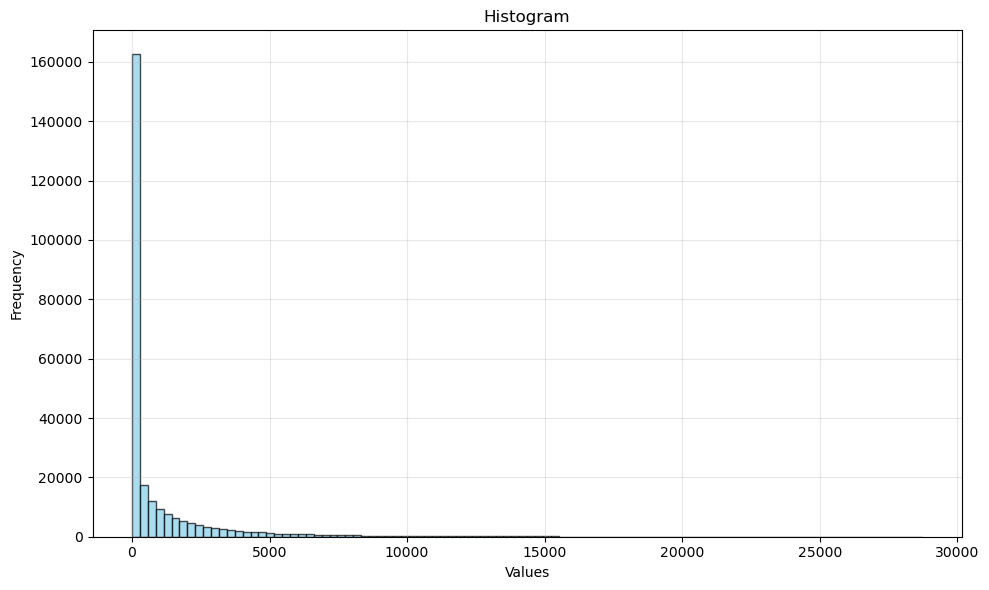

In [105]:
plot_histogram(counts_df.values, bins=100)

In [106]:
min_count=10
min_samples=3

In [107]:
# Count samples where gene count exceeds threshold
keep_genes = (counts_df >= min_count).sum(axis=1) >= min_samples

# Filter the dataframe
filtered_df = counts_df.loc[keep_genes]

print(f"Filtered from {counts_df.shape[0]} to {filtered_df.shape[0]} genes")

Filtered from 62703 to 29555 genes


In [108]:
counts_df = filtered_df

In [109]:
method='log2cpm'

In [111]:
if method == 'cpm':
    # CPM normalization
    norm_df = counts_df.copy()
    for col in norm_df.columns:
        col_sum = norm_df[col].sum()
        norm_df[col] = (norm_df[col] / col_sum) * 1e6
        
elif method == 'log2cpm':
    # Log2 CPM normalization (with pseudocount of 1)
    norm_df = counts_df.copy()
    for col in norm_df.columns:
        col_sum = norm_df[col].sum()
        norm_df[col] = np.log2(((norm_df[col] / col_sum) * 1e6) + 1)

In [114]:
norm_df.head()

,C1,C2,C3,GFP1,GFP2,GFP3,YAF1,YAF2,YAF3
Geneid,,,,,,,,,
ENSG00000290825.1,0.313714,0.116009,0.159118,0.144614,0.556824,0.272329,0.204016,0.590906,0.053670
ENSG00000227232.5,4.051216,4.090413,3.906172,4.517533,4.672051,4.671326,4.374832,4.530864,3.930849
ENSG00000278267.1,0.539452,0.703096,0.493766,0.797464,0.655992,0.952260,0.845972,1.077058,0.105415
ENSG00000233750.3,0.275623,0.223380,0.232546,0.211825,0.143619,0.096602,0.227603,0.302906,0.649414
ENSG00000241860.7,0.439632,0.416765,0.369060,0.396493,0.364964,0.230363,0.382723,0.454081,0.750381


In [112]:
# Extract sample names
samples = counts_df.columns.tolist()

# Extract condition from sample name (assuming format like C1, GFP2, YAF3)
conditions = []
for sample in samples:
    # Extract letters from the beginning of the sample name
    condition = ''.join([c for c in sample if c.isalpha()])
    conditions.append(condition)

# Create metadata DataFrame
metadata = pd.DataFrame({
    'sample': samples,
    'condition': conditions
})
metadata.set_index('sample', inplace=True)

In [113]:
metadata.head()

,condition
sample,
C1,C
C2,C
C3,C
GFP1,GFP
GFP2,GFP


In [117]:
def plot_sample_distributions(counts_df, output_dir=None, log_scale=True):
    """
    Plot the distribution of counts across samples.
    
    Parameters:
    -----------
    counts_df : pandas.DataFrame
        DataFrame with counts
    output_dir : str, optional
        Directory to save the plot
    log_scale : bool
        Whether to use log scale for y-axis
    """
    plt.figure(figsize=(12, 8))
    
    # Create boxplot
    ax = sns.boxplot(data=counts_df)
    
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    
    # Set log scale if requested
    if log_scale:
        plt.yscale('log')
    
    plt.title('Count Distribution Across Samples')
    plt.ylabel('Counts' if not log_scale else 'Counts (log scale)')
    plt.tight_layout()
    
    # Save or show the plot
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, 'sample_distributions.png'), dpi=300)
    else:
        plt.show()
    
    plt.close()


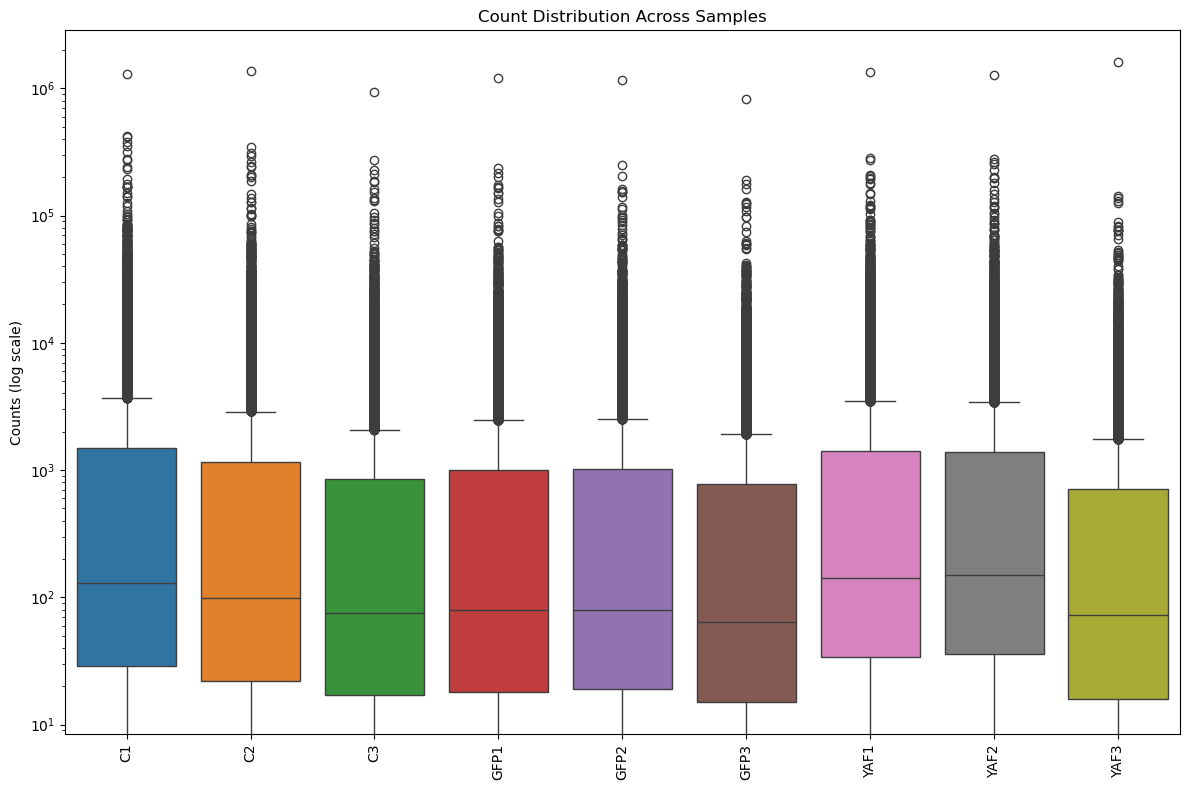

In [118]:
plot_sample_distributions(counts_df)

In [130]:
def plot_pca(norm_df, metadata=None, color_by=None, output_dir=None):
    """
    Perform PCA and plot the results.
    
    Parameters:
    -----------
    norm_df : pandas.DataFrame
        DataFrame with normalized counts
    metadata : pandas.DataFrame, optional
        DataFrame with sample metadata
    color_by : str, optional
        Column in metadata to use for coloring points
    output_dir : str, optional
        Directory to save the plot
    """
    from sklearn.decomposition import PCA
    
    # Transpose to get samples as rows
    data = norm_df.T
    
    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    
    # Create DataFrame with PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df.index = data.index
    
    # Calculate variance explained
    var_explained = pca.explained_variance_ratio_ * 100
    
    # Create plot
    plt.figure(figsize=(10, 8))
    
    if metadata is not None and color_by is not None and color_by in metadata.columns:
        # Add metadata for coloring
        pca_df = pca_df.join(metadata[color_by])
        
        # Plot with colors
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=color_by, s=100)
    else:
        # Simple plot without coloring
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', s=100)
    
    # Add sample labels
    for idx, row in pca_df.iterrows():
        plt.annotate(idx, (row['PC1'], row['PC2']), 
                     xytext=(5, 5), textcoords='offset points')
    
    # Set axis labels with variance explained
    plt.xlabel(f'PC1 ({var_explained[0]:.2f}%)')
    plt.ylabel(f'PC2 ({var_explained[1]:.2f}%)')
    
    plt.title('PCA of RNA-seq Samples')
    plt.tight_layout()
    
    # Save or show the plot
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, 'pca_plot.png'), dpi=300)
    else:
        plt.show()
    
    plt.close()
    
    return pca_df

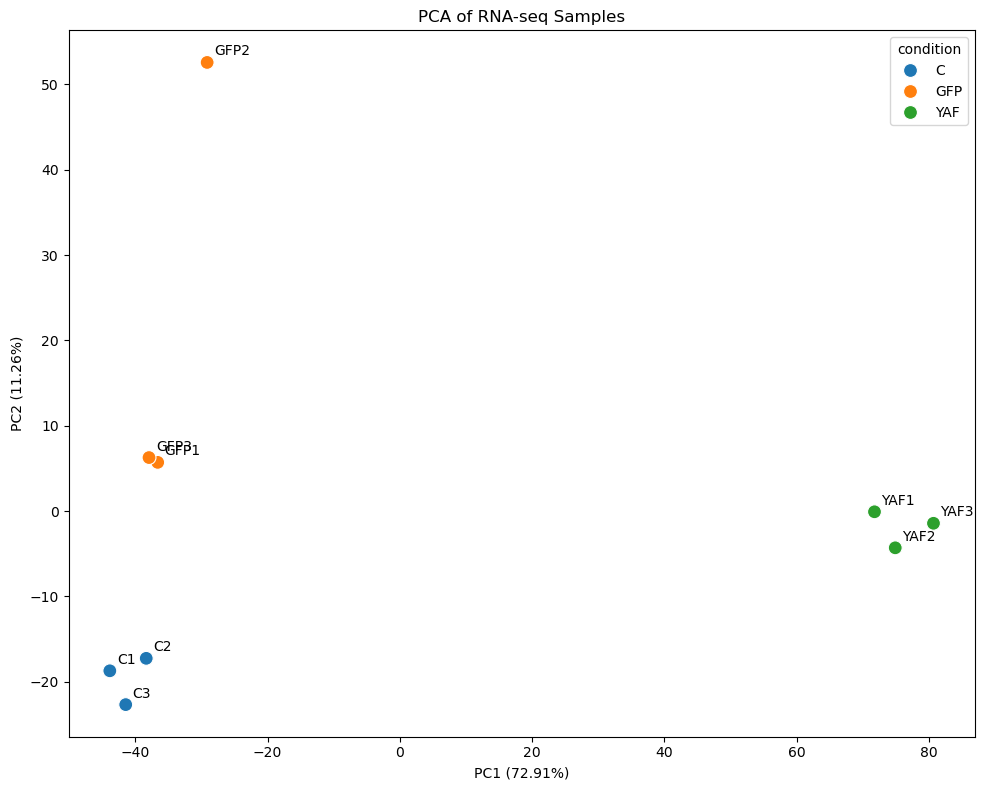

,PC1,PC2,condition
C1,-43.868389,-18.729852,C
C2,-38.363662,-17.268630,C
C3,-41.466073,-22.693188,C
GFP1,-36.626836,5.699817,GFP
GFP2,-29.151105,52.574944,GFP
GFP3,-37.942482,6.263582,GFP
YAF1,71.786718,-0.092060,YAF
YAF2,74.924285,-4.315107,YAF
YAF3,80.707544,-1.439506,YAF


In [131]:
plot_pca(norm_df, metadata=metadata, color_by='condition')
